# Exploratory Data Analysis

Below is the code for connecting to the database.

In [4]:
import pandas as pd
import psycopg2 as pg
import pandas.io.sql as psql
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Connect to database
#def connect(host, database):
#    connection = pg.connect('host={} dbname={}'.format(host, database))
#    return connection

# Specify connection host and database
#connection = connect('pg', 'jobs2018')

conn_string="host='pg' dbname='jobs2018' user='yliu' password='coeditor laborious barbed figment enzyme'"
connection = pg.connect(conn_string)

## Question 1: Is time_taken an useable field?

In [11]:
# Query sample from time_taken field
time_taken = psql.read_sql("SELECT time_taken FROM user_click;", connection)

# Convert time_taken from seconds to minutes
time_taken['min1'] = time_taken['time_taken']/60
time_taken['min2'] = time_taken['time_taken']/1000/60

# Summarize new field
time_taken.describe()

,time_taken,min1,min2
count,9.965680e+07,9.965680e+07,9.965680e+07
mean,4.498695e+04,7.497825e+02,7.497825e-01
std,1.615634e+05,2.692724e+03,2.692724e+00
min,3.130000e+02,5.216667e+00,5.216667e-03
25%,2.374600e+04,3.957667e+02,3.957667e-01
50%,3.239500e+04,5.399167e+02,5.399167e-01
75%,4.405000e+04,7.341667e+02,7.341667e-01
max,4.498797e+07,7.497995e+05,7.497995e+02


We can see from above that the outliers are having a significant influence on the mean, etc. The following plots also illustrate this point.

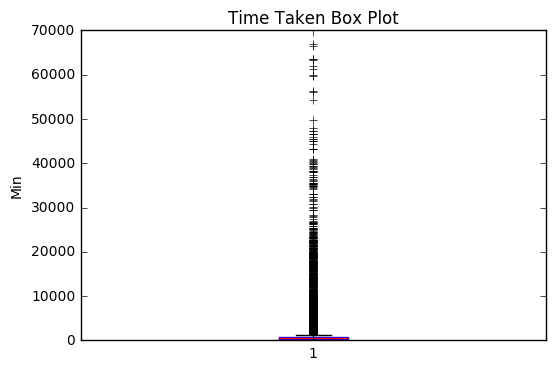

In [7]:
# Create box plot with outliers
plt.boxplot(time_taken['min1'])
plt.title('Time Taken Box Plot')
plt.ylabel('Min')
plt.show()

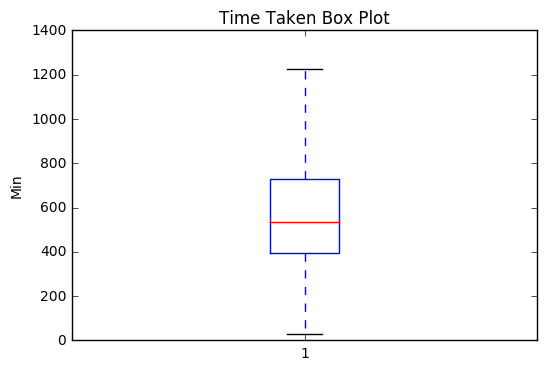

In [8]:
# Create box plot without outliers
plt.boxplot(time_taken['min1'], 0, '')
plt.title('Time Taken Box Plot')
plt.ylabel('Min')
plt.show()

Note how skewed the histogram is below. It contains a tail on the right side of the histogram that extends to 70,000 minutes.

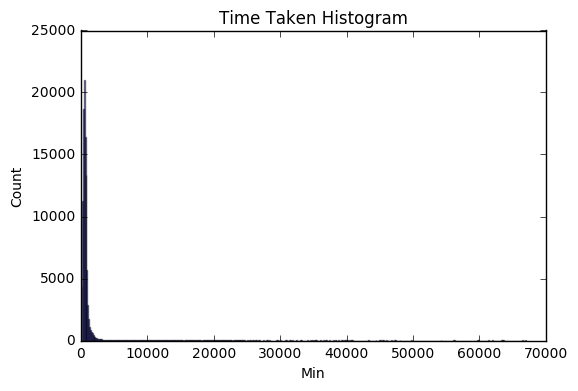

In [10]:
# Create histogram
plt.hist(time_taken['min1'], 500, alpha = 0.5, facecolor = 'blue')
plt.title('Time Taken Histogram')
plt.xlabel('Min')
plt.ylabel('Count')
plt.show()

## Question 2: What is the trend in the number of users per day over time?

In [7]:
# Query aggregated table with click date and unique ip addresses
click_summary = psql.read_sql("SELECT click_date, COUNT(DISTINCT ip) as ip_count FROM user_click GROUP BY click_date;", connection)

The plot below shows an oscillating pattern in the number of users. We can reasonably expect this from the number of users dropping on weekends, etc. However, we do see a very low user count between December 2013 and February 2014. For our analysis, we may need to just use data from march 2014 to June 2014. Because of the limited number of months captured in the data, it's difficult to see any seasonality differences in the number of users per day.

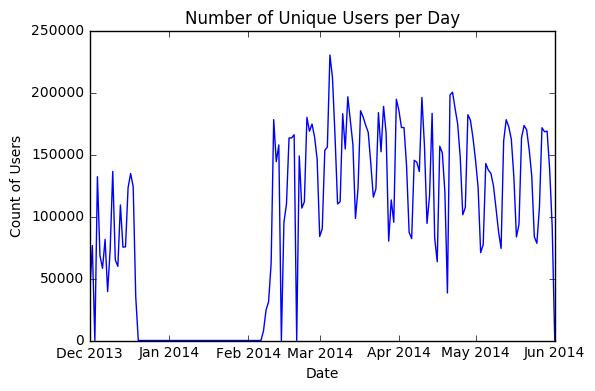

In [9]:
# Create a line graph using the data
plt.plot(click_summary['click_date'], click_summary['ip_count'])
plt.title('Number of Unique Users per Day')
plt.xlabel('Date')
plt.ylabel('Count of Users')
plt.show()

In [12]:
# Select all dates with less than 10 distinct users
click_summary[(click_summary['ip_count'] < 10)]

,click_date,ip_count
2,2013-12-03,5
19,2013-12-20,1
20,2013-12-21,1
21,2013-12-22,1
22,2013-12-23,1
23,2013-12-24,1
24,2013-12-25,1
25,2013-12-26,1
26,2013-12-27,1
27,2013-12-28,1


## Question: How many clicks come from registered users?

In [3]:
clicks = psql.read_sql("SELECT COUNT(*) FROM user_click;", connection)
clicks

,count
0,99656801


In [4]:
unregistered_clicks = psql.read_sql("SELECT COUNT(*) FROM user_click WHERE aguid IS NULL;", connection)
unregistered_clicks

,count
0,17914987


In [5]:
per_registered = 1 - (unregistered_clicks / clicks)
per_registered

,count
0,0.820233


In [6]:
# Number of distinct users
distinct_users = psql.read_sql("SELECT COUNT(DISTINCT aguid) FROM user_click;", connection)
distinct_users

,count
0,42781621


## Question: How many users are return users (clicked on an ad on more than one day)?

In [7]:
return_users = psql.read_sql("SELECT aguid, COUNT(DISTINCT click_date) FROM user_click GROUP BY aguid HAVING COUNT(DISTINCT click_date) > 1;", connection)
return_users

,aguid,count
0,0000034894b54e1ba91e5dacf75279be,2
1,0000045f72f64debbc77f7014e03b93d,3
2,0000068cc4d94bd8bfd73ceab2a4306c,3
3,00000c3ff0c64da1848feb0bc1a6a106,3
4,00000ed22109469a9553140b843b8d6a,2
5,0000105e5c484bf5926aba0dd614bca0,4
6,00002b941c9740ca86c32431ec5ef327,2
7,00003fa5994149a1bd16d967a032b9ab,2
8,00004ba85dab4375bdb969cd1be5a5b3,8
9,00004ebbdd434c3b9178a013a48304e5,2


## Question: How many jobs do a user look at in a typical day?

In [8]:
clicks_by_user_day = psql.read_sql("SELECT click_date, ip, COUNT(*) FROM user_click GROUP BY ip, click_date;", connection)
clicks_by_user_day

,click_date,ip,count
0,2014-05-31,100.0.0.123,3
1,2013-12-02,100.0.0.142,1
2,2014-02-13,100.0.0.157,2
3,2014-02-12,100.0.0.172,1
4,2014-03-16,100.0.0.208,1
5,2014-04-03,100.0.0.208,1
6,2014-03-07,100.0.0.213,1
7,2014-03-10,100.0.0.213,2
8,2014-03-11,100.0.0.213,1
9,2014-03-13,100.0.0.213,3


In [9]:
clicks_by_user_day["count"].mean()

5.878632196696405

## Question: Are job postings every posted multiple times

In [3]:
uniquejobs = psql.read_sql("SELECT jvguid ,newdate, buid, jobtitle FROM jobposting;", connection)
uniquejobscount = uniquejobs.groupby(['buid', 'jobtitle']).nunique().drop('jobtitle',axis=1).drop('buid',axis=1).reset_index()
postedonce = uniquejobscount.loc[uniquejobscount['newdate']==1]
postedoncesum = postedonce['newdate'].sum()
postedtwice = uniquejobscount.loc[uniquejobscount['newdate']==2]
postedtwicesum = postedtwice['newdate'].sum()

This chart shows the number of aggregated number postings that were posted 'newdate' number of days.  For example the second row is 2, meaning that 419126 total postings were posted twice, leading to 419126/2 = 209563 unique postings posted twice. This is to show that the jobs re-posted more times have an impact on the distribution

In [8]:
uniquejobscount['sumpostings']=uniquejobscount['newdate']
uniquejobscount.groupby(['newdate']).sum()

,jvguid,sumpostings
newdate,,
1,1789927,1615585
2,522859,419126
3,252016,190701
4,164324,111508
5,100746,70885
6,70577,48324
7,55671,38381
8,47297,32192
9,43470,27441


Since most postings were posted either once or twice, I wanted to see the longer tail distribution in context so I excluded the first two

C:\Users\pchang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


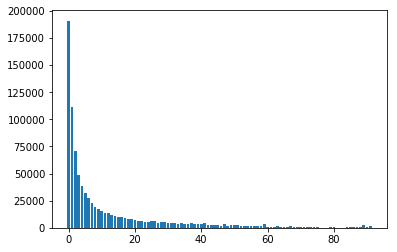

In [10]:
morethantwo = uniquejobscount.loc[uniquejobscount['newdate']>2]
morethantwo['sumdate'] = morethantwo['newdate']

jobsperbin = morethantwo[['sumdate','newdate']].groupby(['newdate']).sum().reset_index()
plt.bar(range(len(jobsperbin['sumdate'])),jobsperbin['sumdate'],align='center')
plt.show()

Now that we see that the longer tail has some influence, here the total number of jobs that were reposted over 50 times is less than 50,000, meaning they don't have too much representation.

In [11]:
morethan50 = morethantwo.loc[morethantwo['newdate']>50]
morethan50['newdate'].sum()

47690

Investigating outliers that reposted many times, we see that they were posted multiple days in a row, indicating either user error or intientional manipulation of the system

In [12]:
outliers = uniquejobscount.reset_index().sort_values(by='newdate',ascending=False).head()
outliers

,index,buid,jobtitle,jvguid,newdate,sumpostings
609334,609334,24747 ...,Electrical Engineer - Entry Level ...,436,94,94
1490391,1490391,287 ...,Customer Service Associate II ...,4894,94,94
609346,609346,24747 ...,Environmental Engineer - Mid Level ...,227,94,94
609342,609342,24747 ...,Engineering Intern ...,276,94,94
609356,609356,24747 ...,Instrumentaion & Controls Engineer - Entry Lev...,109,94,94


In [13]:
pd.merge(outliers, uniquejobs, how = 'left', left_on=['buid','jobtitle'], right_on = ['buid','jobtitle'])

,index,buid,jobtitle,jvguid_x,newdate_x,sumpostings,jvguid_y,newdate_y
0,609334,24747 ...,Electrical Engineer - Entry Level ...,436,94,94,56229380-6642-40D5-BD83-1E2EFB47E56C ...,2014-02-15
1,609334,24747 ...,Electrical Engineer - Entry Level ...,436,94,94,9E9B26B7-CBE9-4AC5-A632-D499A8CFB4BD ...,2014-02-15
2,609334,24747 ...,Electrical Engineer - Entry Level ...,436,94,94,DE4C8513-E172-4717-8EE3-5078EB08FFD6 ...,2014-02-15
3,609334,24747 ...,Electrical Engineer - Entry Level ...,436,94,94,9F5FDA93-9C4F-4EF3-8611-EFAAEDEA7B51 ...,2014-02-15
4,609334,24747 ...,Electrical Engineer - Entry Level ...,436,94,94,3D8DD206-23BE-4DA1-A264-F45267B01000 ...,2014-02-15
5,609334,24747 ...,Electrical Engineer - Entry Level ...,436,94,94,9094D433-3391-4CB7-90E9-22558BD9A618 ...,2014-02-16
6,609334,24747 ...,Electrical Engineer - Entry Level ...,436,94,94,D0F91804-8F41-469B-BA80-3DC8B1BA5CC0 ...,2014-02-16
7,609334,24747 ...,Electrical Engineer - Entry Level ...,436,94,94,FA93AB96-C2D5-4BB2-8860-4EBF18F633D1 ...,2014-02-16
8,609334,24747 ...,Electrical Engineer - Entry Level ...,436,94,94,DA4D2B93-6A0B-43D8-A14F-7375924776EE ...,2014-02-16
9,609334,24747 ...,Electrical Engineer - Entry Level ...,436,94,94,701C16CF-A3B0-49B9-9DC6-F47C4371D807 ...,2014-02-16


##Are there any patterns in the length a job posting was online?

In [14]:
dates = psql.read_sql("SELECT jvguid ,newdate, expiredate, buid, jobtitle FROM jobposting;", connection)
dates['postlength'] = dates['expiredate'] - dates['newdate']
dates['postlengthfloat'] = dates['postlength'] / np.timedelta64(1, 'D')
dates.sort_values(by='postlength',ascending=False).head(5)

,jvguid,newdate,expiredate,buid,jobtitle,postlength,postlengthfloat
4199577,6011F83E-C557-4E81-BACE-C8564C61AF9F ...,2014-02-11,2014-06-09,1947 ...,Registered Nurse 3 ...,118 days,118.0
4237440,DCD32CB0-D31B-4DFA-B77D-2123C61174AF ...,2014-02-11,2014-06-09,7244 ...,Surgical Physicans Assistant ...,118 days,118.0
4179032,C58E45D0-5EC2-4E1F-91BE-4EAB0E505BE4 ...,2014-02-11,2014-06-09,207 ...,Cashier job in WASCO ...,118 days,118.0
4193273,400C4C8B-C2DA-4F73-9FE0-695520AE9059 ...,2014-02-11,2014-06-09,8316 ...,"3rd Shift Stocking Team Member - Royal Oak, MI...",118 days,118.0
4232967,52B4A1E5-9436-47C3-A7D6-C0DBFDFA3F6C ...,2014-02-11,2014-06-09,25923 ...,Field Compliance Manager ...,118 days,118.0


In [16]:
dates['postlengthfloat'].describe()

count    3.687740e+06
mean     2.029292e+01
std      1.918793e+01
min      0.000000e+00
25%      5.000000e+00
50%      1.500000e+01
75%      3.000000e+01
max      1.180000e+02
Name: postlengthfloat, dtype: float64

In [17]:
dates[['postlengthfloat','jvguid']].groupby(['postlengthfloat']).count().reset_index()

,postlengthfloat,jvguid
0,0.0,64839
1,1.0,297334
2,2.0,249547
3,3.0,146154
4,4.0,108716
5,5.0,116931
6,6.0,118197
7,7.0,126889
8,8.0,114135
9,9.0,88861


From this table we can see that most of the postings were posted for less than 20 days. What stood out was the postings that were posted 0-2 days, which could be mistakes. So to dig deeper, we looked at these postings to see if they were reposted. There were around 300,000 unique jobs that had postings last less than 3 days representing around 600,000 total job postings that were posted for less than 3 days

In [18]:
len(pd.DataFrame(dates.loc[dates['postlengthfloat']<3])[['buid','jobtitle']].drop_duplicates())

279968

In [19]:
len(pd.DataFrame(dates.loc[dates['postlengthfloat']<3])[['buid','jobtitle']])

611720

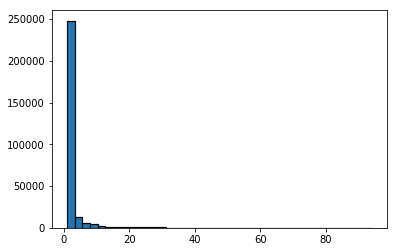

In [22]:
lessthanthree_jobs = pd.DataFrame(dates.loc[dates['postlengthfloat']<3])[['buid','jobtitle']].drop_duplicates()
lessthanthree=pd.merge(lessthanthree_jobs, uniquejobscount, how = 'left', left_on=['buid','jobtitle'], right_on = ['buid','jobtitle'])
lessthanthree = lessthanthree[np.isfinite(lessthanthree['newdate'])]
plt.hist(lessthanthree['newdate'], bins = 40,edgecolor='black', linewidth=1.2)
plt.show()

As we can see from the table and histogram, most of the postings that were posted less than 3 times were reposted only once, implying mistakes

In [24]:
lessthanthree.groupby(['newdate']).count().head(15)

,buid,jobtitle,jvguid,sumpostings
newdate,,,,
1.0,194976,194976,194976,194976
2.0,36739,36739,36739,36739
3.0,16281,16281,16281,16281
4.0,8039,8039,8039,8039
5.0,4444,4444,4444,4444
6.0,2934,2934,2934,2934
7.0,2240,2240,2240,2240
8.0,1743,1743,1743,1743
9.0,1440,1440,1440,1440


## What are the most popular data tools in the job requirements

java115444 python27737 javascript52019 sql145657 tableau4194 matlab9096 scala168476 hadoop8689


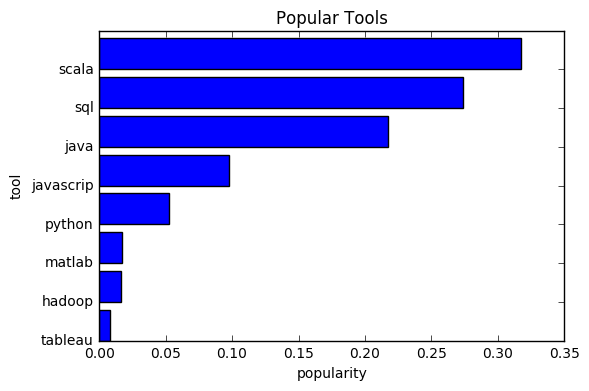

In [5]:
alldesc= psql.read_sql("SELECT description FROM jobposting;", connection)
java,python,javascript,sql,tableau,matlab,scala,hadoop=[0 for i in range(8)]
for i in alldesc['description']:
    if i!=None:
        desc = i.upper()
        if 'JAVA' in desc:
            java+=1
        if 'PYTHON' in desc:
            python+=1
        if 'JAVASCRIPT' in desc:
            javascript+=1
        if 'SQL' in desc:
            sql+=1
        if 'TABLEAU' in desc:
            tableau+=1
        if 'MATLAB' in i.upper():
            matlab+=1
        if 'SCALA' in i.upper():
            scala+=1
        if 'HADOOP' in i.upper():
            hadoop+=1
print("java{} python{} javascript{} sql{} tableau{} matlab{} scala{} hadoop{}".
      format(java,python,javascript,sql,tableau,matlab,scala,hadoop))
types = {"java":java,"python":python,"javascrip":javascript,"sql":sql,"tableau":tableau,"matlab":matlab,"scala":scala,"hadoop":hadoop}
top_types = sorted(types,key=types.__getitem__,reverse = True)
top_occur = [types[top_types[i]]/float(sum(types.values())) for i in range(len(types))]
plt.barh(range(1,9),list(reversed(top_occur)))
plt.yticks(range(1,9), list(reversed(top_types)))
plt.title('Popular Tools')
plt.xlabel('popularity')
plt.ylabel('tool')
plt.show()

## Are some locations more popular than others for specific fields?

In [6]:
import collections
loc=psql.read_sql("SELECT loc FROM jobposting;", connection)
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
def extract_state(location):
     global states
     if location==None:
          return(location)
     else:
          match = next((s for s in states if s in location), False)
          if match:
               return(match)
          else:
               return('UNKNOWN')
software_loc=psql.read_sql("SELECT loc FROM jobposting WHERE software=TRUE;", connection)
software_state = [extract_state(l) for l in software_loc['loc']]
software_counts =collections.Counter(software_state)
print(software_counts)

Counter({'CA': 9124, 'UNKNOWN': 8175, 'WA': 3302, 'IN': 3279, 'TX': 2522, 'VA': 2467, 'MI': 2408, 'MA': 2370, 'MD': 2063, 'CO': 1897, 'NY': 1888, 'GA': 1382, 'PA': 1247, 'FL': 1169, 'IL': 1135, 'MN': 1075, 'NJ': 1031, 'CT': 901, 'NC': 807, 'ME': 803, 'AL': 773, 'OR': 767, 'AZ': 695, 'OH': 664, 'MO': 512, 'UT': 427, 'AR': 409, 'DE': 387, 'NE': 377, 'DC': 368, 'NH': 279, 'IA': 269, 'WI': 244, 'LA': 200, 'TN': 193, 'KS': 187, 'RI': 173, 'OK': 162, 'AK': 153, 'NM': 144, 'NV': 128, 'SC': 126, 'ID': 123, 'KY': 111, 'HI': 106, 'WV': 103, 'ND': 90, 'VT': 57, 'MT': 55, 'MS': 51, 'SD': 45, 'WY': 12, None: 1})


In [7]:
finance_loc=psql.read_sql("SELECT loc FROM jobposting WHERE finance=TRUE;", connection)
finance_state = [extract_state(l) for l in finance_loc['loc']]
finance_counts =collections.Counter(finance_state)
print(finance_counts)

Counter({'UNKNOWN': 9226, 'CA': 5462, 'ME': 5157, 'NY': 5067, 'TX': 3345, 'IL': 2877, 'MI': 2597, 'FL': 2370, 'NJ': 2345, 'GA': 2320, 'MA': 2032, 'PA': 1948, 'IN': 1872, 'NC': 1721, 'MN': 1682, 'VA': 1658, 'MO': 1448, 'OH': 1410, 'CO': 1280, 'CT': 1237, 'AL': 1139, 'WA': 1099, 'MD': 1097, 'AZ': 1044, 'DC': 953, 'TN': 866, 'AR': 861, 'DE': 642, 'OR': 621, 'WI': 569, 'NE': 488, 'LA': 464, 'SC': 432, 'KS': 420, 'IA': 419, 'OK': 401, 'UT': 375, 'KY': 300, 'ID': 250, 'NV': 237, 'AK': 237, 'MS': 227, 'NH': 211, 'RI': 205, 'HI': 158, 'ND': 146, 'WV': 131, 'NM': 130, 'SD': 76, 'MT': 59, 'WY': 56, 'VT': 39, None: 1})
